In [1]:
import urllib.request, json, datetime, re
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
#Scrape Radio-Canada and wikipedia to get data.
import scraper
tables = scraper.get_tables()

In [14]:
#Linearly iterpolate for the missing tests.
tables['Tests'] = tables['Tests'].interpolate(limit_direction='backward').round(1)
#tables['Tests'].plot()

#Merge the Active and Tests tables with the Quebec, Canada table
tables['Quebec, Canada'] = tables['Quebec, Canada'].join(tables['Active']).join(tables['Tests'])
del tables['Active']
del tables['Tests']

#Variable total tests is the sum of negative tests and confirmed cases.
tables['Quebec, Canada']['Total tests'] = tables['Quebec, Canada']['Confirmed'] + tables['Quebec, Canada']['Negative']

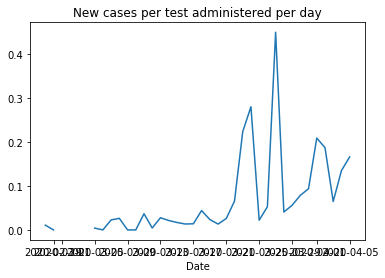

In [45]:
#Make a new DataFrame with total new cases divided by new tests
tables['New'] = pd.DataFrame()
tables['New']['New Cases'] = tables['Quebec, Canada']['Confirmed'].sub(tables['Quebec, Canada']['Confirmed'].shift(-1), fill_value=0)
tables['New']['New Tests'] = tables['Quebec, Canada']['Total tests'].sub(tables['Quebec, Canada']['Total tests'].shift(-1), fill_value=0)

plt.figure()
tables['New']['New Cases'].div(tables['New']['New Tests']).plot(title='New cases per test administered per day')
plt.show()